# Investigating Posts that Peform Similarly 
Our client is interested in knowing which posts perform well, can we group these together and find similar factors?

# 1. Import Data

In [64]:
import pandas as pd

In [65]:
df = pd.read_csv('clusterdata.csv')

In [66]:
# View the first 5 rows

df.head()

,user_id,published,post_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,af60c7da-acb4-11ec-880a-a0cec8d2d278,1648512000,short,216,58,5,53,18,12,21,6,43
1,af60c7e4-acb4-11ec-ab31-a0cec8d2d278,1647993600,short,196,45,0,73,35,8,16,25,39
2,af60c7f9-acb4-11ec-bead-a0cec8d2d278,1647907200,short,138,6,13,59,33,5,16,12,13
3,af60c815-acb4-11ec-a572-a0cec8d2d278,1648080000,short,81,9,1,9,34,18,11,4,5
4,af60c80d-acb4-11ec-aeb5-a0cec8d2d278,1647820800,short,166,53,11,75,0,5,17,24,45


In [67]:
df.tail()

,user_id,published,post_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
7042,af60c816-acb4-11ec-b01d-a0cec8d2d278,1648166400,photo,293,15,25,173,79,9,15,17,0
7043,af60c7fd-acb4-11ec-8226-a0cec8d2d278,1647993600,short,119,14,0,24,58,8,15,13,1
7044,af60c7e0-acb4-11ec-9163-a0cec8d2d278,1648166400,short,100,9,5,0,46,25,13,8,8
7045,af60c7f6-acb4-11ec-ba47-a0cec8d2d278,1647388800,short,74,10,8,0,38,15,16,0,5
7046,af60c7d9-acb4-11ec-84c2-a0cec8d2d278,1648166400,video,225,46,7,142,23,11,30,19,0


# 2. Split Data into Training and Testing

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
train, test = train_test_split(df,test_size=0.3,random_state=1234)

In [70]:
train.shape

(4932, 12)

In [71]:
test.shape

(2115, 12)

In [72]:
2115/ df.shape[0]

0.3001277139208174

# 3. Exploratory Data Analysis

## Review Data

In [73]:
train.dtypes

user_id          object
published         int64
post_type        object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
dtype: object

In [74]:
train.post_type.unique()

array(['short', 'video', 'photo', 'text'], dtype=object)

In [75]:
train.info

<bound method DataFrame.info of                                    user_id   published post_type  \
5145  af60c7e1-acb4-11ec-a565-a0cec8d2d278  1647734400     short   
5940  af60c819-acb4-11ec-ac22-a0cec8d2d278  1647734400     video   
5046  af60c813-acb4-11ec-9b28-a0cec8d2d278  1647648000     video   
6089  af60c809-acb4-11ec-8a3c-a0cec8d2d278  1647388800     short   
3890  af60c7e2-acb4-11ec-9952-a0cec8d2d278  1648166400     video   
...                                    ...         ...       ...   
664   af60c7dc-acb4-11ec-bb60-a0cec8d2d278  1648080000     short   
3276  af60c803-acb4-11ec-98a3-a0cec8d2d278  1647993600     short   
1318  af60c80d-acb4-11ec-aeb5-a0cec8d2d278  1648166400     short   
723   af60c806-acb4-11ec-8e18-a0cec8d2d278  1648252800     short   
2863  af60c7fb-acb4-11ec-bab3-a0cec8d2d278  1648252800     video   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
5145            378             0          22        214         98   

In [76]:
train.isnull().sum()

user_id          0
published        0
post_type        0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

## Summary Stats

In [77]:
train.describe()

,published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,4.932000e+03,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000
mean,1.647943e+09,189.214923,29.540552,9.145985,85.684712,41.381387,14.974250,18.666464,13.934712,14.573398
std,3.513294e+05,75.843449,20.669640,7.807651,67.498828,24.422694,5.012694,8.141871,9.826429,16.039171
min,1.647389e+09,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.647648e+09,121.000000,10.000000,3.000000,19.000000,23.000000,12.000000,13.000000,6.000000,1.000000
50%,1.647994e+09,191.000000,20.000000,7.000000,79.000000,37.000000,15.000000,17.000000,13.000000,8.000000
75%,1.648253e+09,256.000000,50.000000,14.000000,150.000000,57.000000,18.000000,24.000000,20.000000,23.000000
max,1.648512e+09,378.000000,70.000000,37.000000,239.000000,127.000000,34.000000,45.000000,51.000000,67.000000


In [78]:
train.describe(include='object')

,user_id,post_type
count,4932,4932
unique,100,4
top,af60c7c8-acb4-11ec-adad-a0cec8d2d278,short
freq,71,3081


## Plot Distributions

In [79]:
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

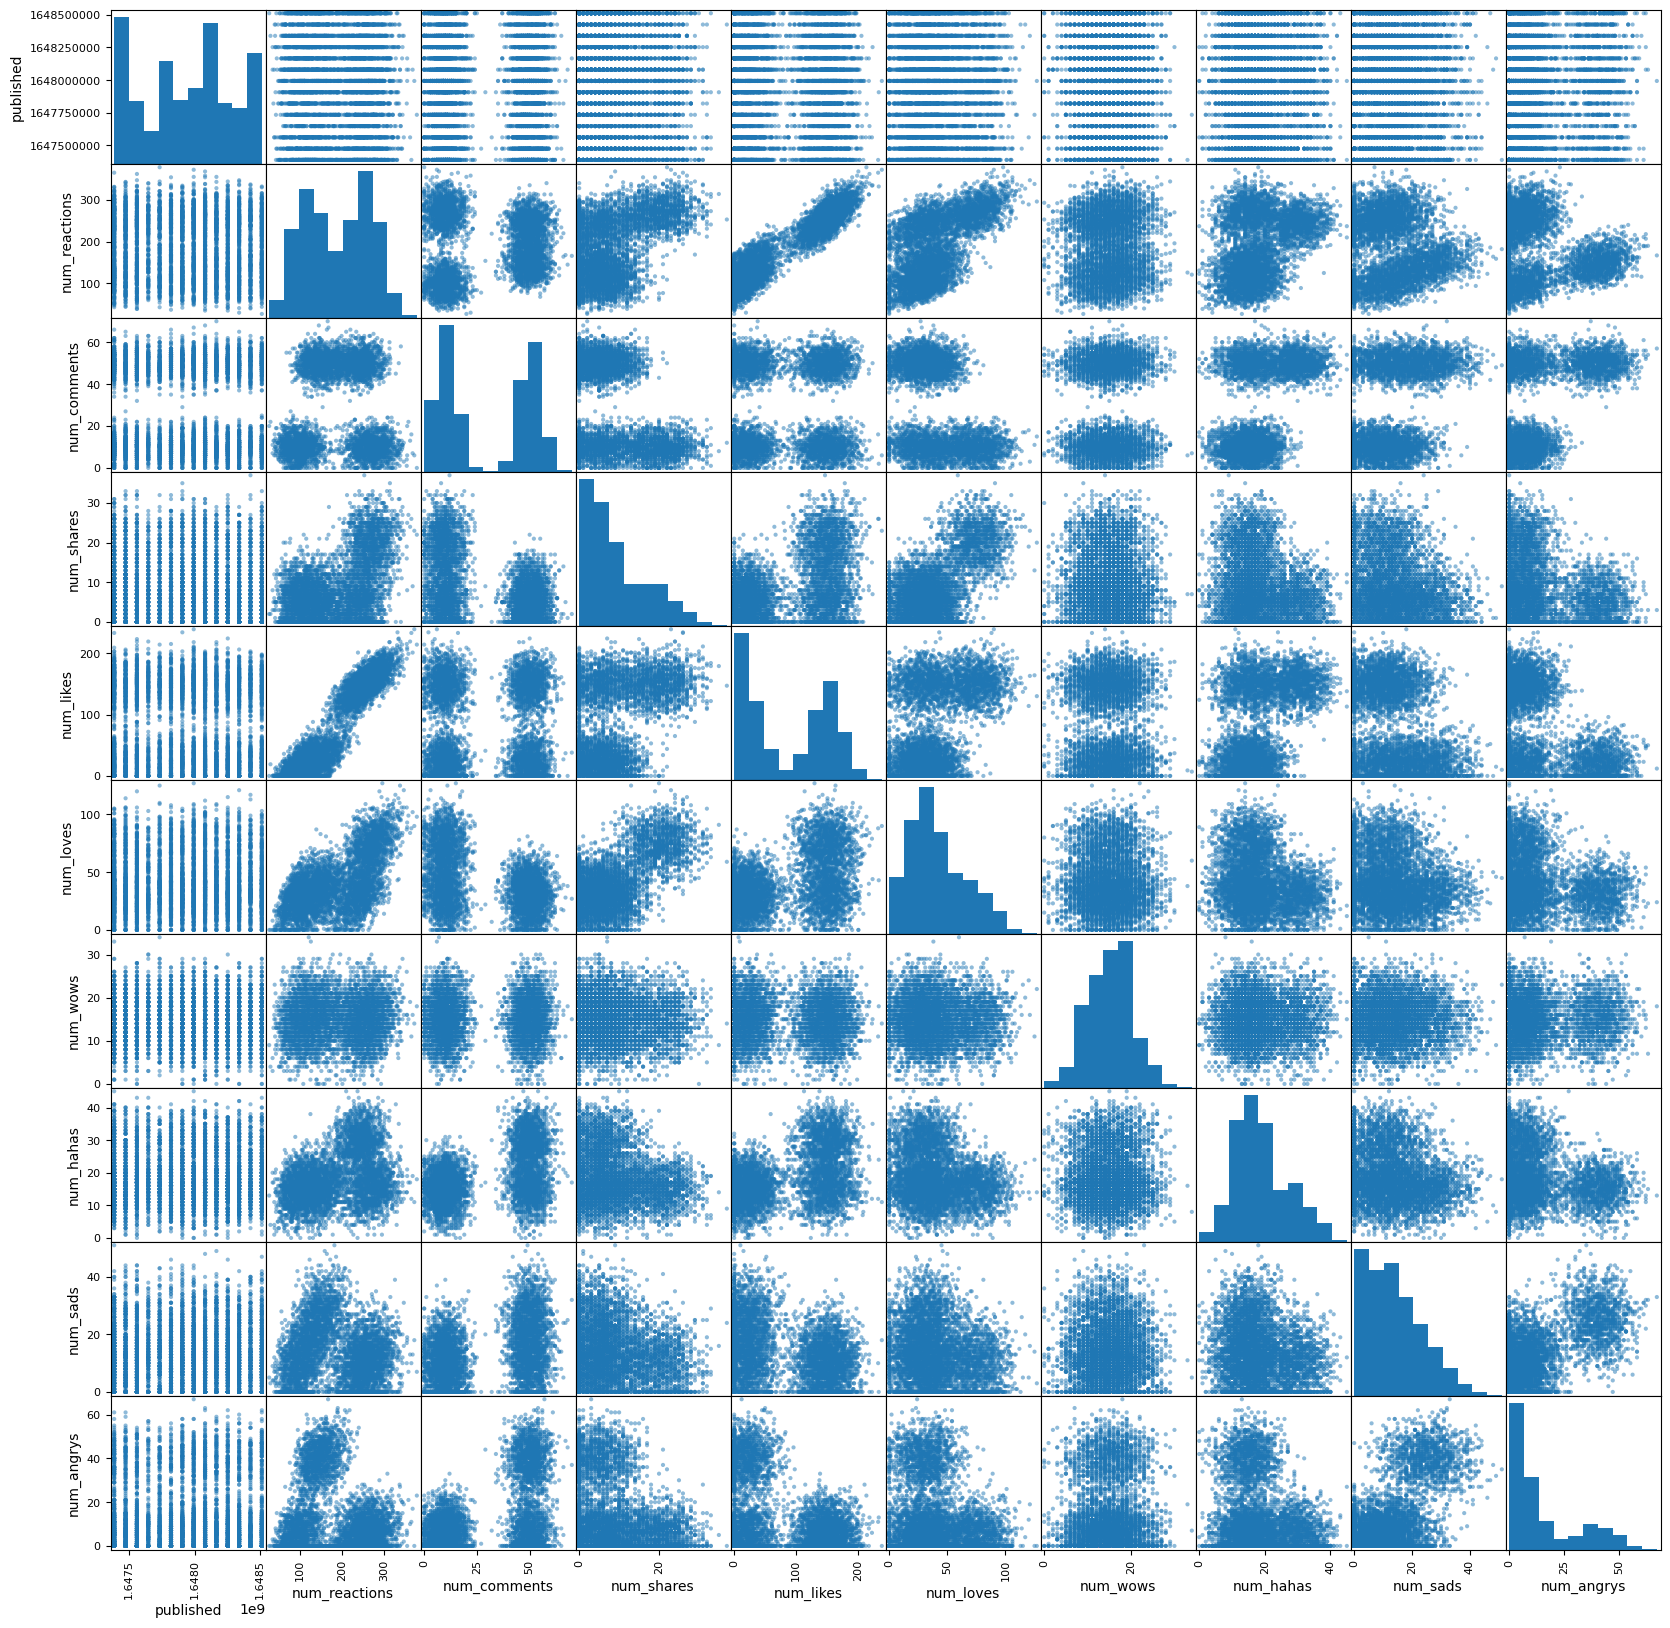

In [80]:
scatter_matrix(train, figsize=(20,20))
plt.show()

## Review Types of Posts

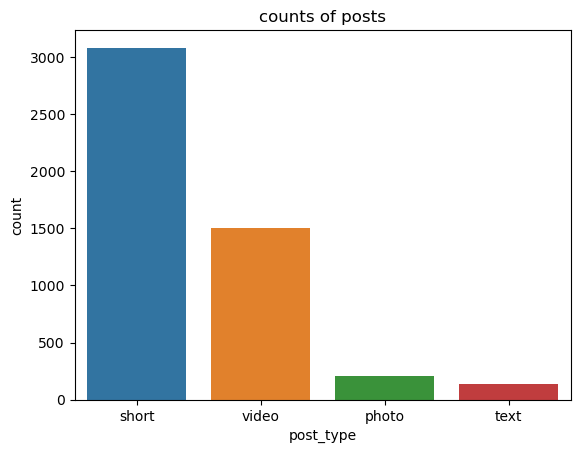

In [81]:
sns.countplot(x='post_type',data=train).set_title('counts of posts')
plt.show()

## Can we see any relationships between Post Type and Responses

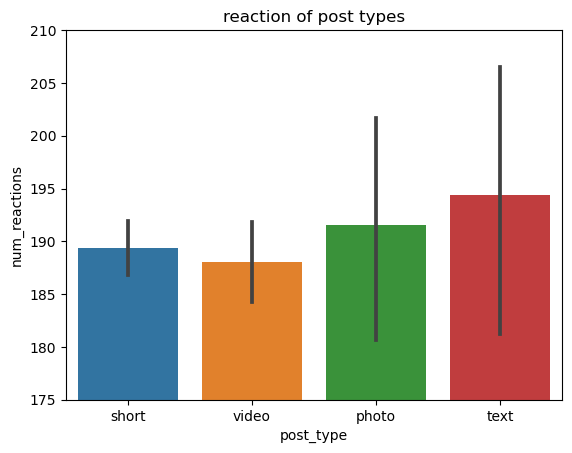

In [82]:
sns.barplot(x='post_type', y='num_reactions',data=train).set_title('reaction of post types')
plt.ylim((175,210))
plt.show()

## What does status published represent?

In [83]:
pd.to_datetime(1647734400, unit='s')

Timestamp('2022-03-20 00:00:00')

In [84]:
train['published']

5145    1647734400
5940    1647734400
5046    1647648000
6089    1647388800
3890    1648166400
           ...    
664     1648080000
3276    1647993600
1318    1648166400
723     1648252800
2863    1648252800
Name: published, Length: 4932, dtype: int64

In [85]:
#changing the timestamp into date and time stamps

train['timestamp']=pd.to_datetime(train['published'], unit='s')

## Is there a relationship with time?

In [86]:
train['day'] = train['timestamp'].dt.day
train['day_name'] = train['timestamp'].dt.day_name()
train['monthstart'] = train['timestamp'].dt.is_month_start
train['monthend'] = train['timestamp'].dt.is_month_end
train['quarterstart'] = train['timestamp'].dt.is_quarter_start
train['quarterend'] = train['timestamp'].dt.is_quarter_end
train['month'] = train['timestamp'].dt.month

In [87]:
train.head()

,user_id,published,post_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,timestamp,day,day_name,monthstart,monthend,quarterstart,quarterend,month
5145,af60c7e1-acb4-11ec-a565-a0cec8d2d278,1647734400,short,378,0,22,214,98,18,18,7,23,2022-03-20,20,Sunday,False,False,False,False,3
5940,af60c819-acb4-11ec-ac22-a0cec8d2d278,1647734400,video,248,11,24,127,69,19,8,25,0,2022-03-20,20,Sunday,False,False,False,False,3
5046,af60c813-acb4-11ec-9b28-a0cec8d2d278,1647648000,video,147,57,0,26,57,12,4,14,34,2022-03-19,19,Saturday,False,False,False,False,3
6089,af60c809-acb4-11ec-8a3c-a0cec8d2d278,1647388800,short,114,51,6,2,22,7,21,22,40,2022-03-16,16,Wednesday,False,False,False,False,3
3890,af60c7e2-acb4-11ec-9952-a0cec8d2d278,1648166400,video,158,47,0,28,39,7,12,33,39,2022-03-25,25,Friday,False,False,False,False,3


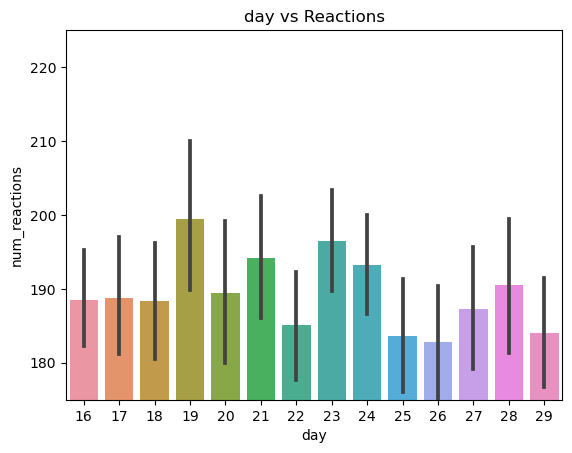

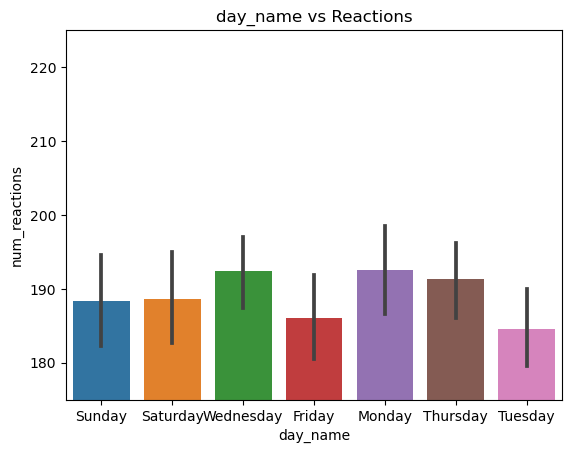

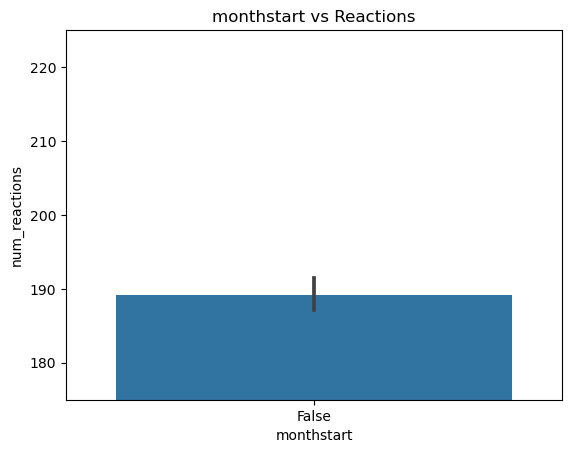

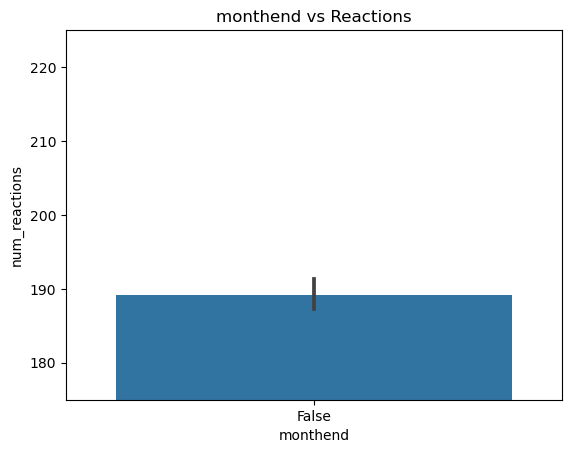

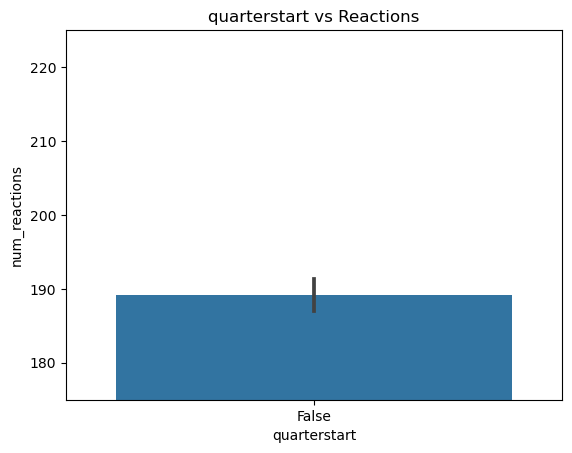

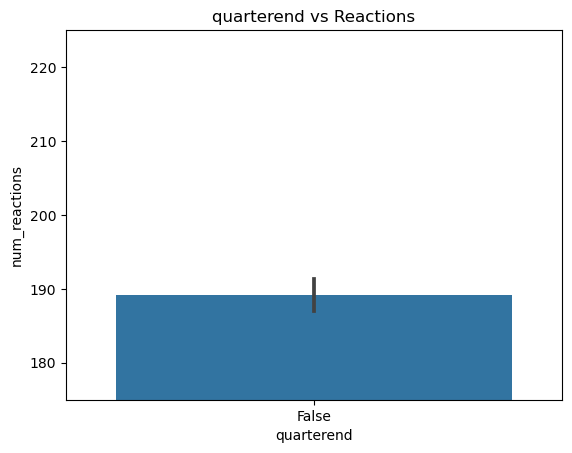

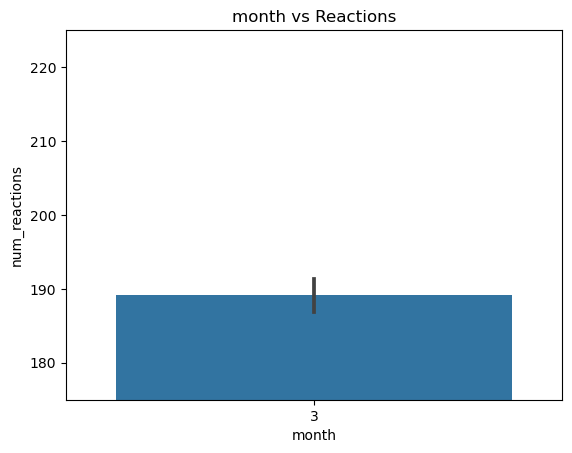

In [88]:
for col in train.columns[-7:]:
    sns.barplot (x=col, y='num_reactions', data=train).set_title(f'{col} vs Reactions')
    plt.ylim((175,225))
    plt.show()

In [89]:
train = train.drop(['timestamp','published','day','monthstart','monthend','quarterstart','quarterend','month'], axis=1)

# 4. Data Preprocessing

## Scale Features

In [90]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler ()
scaled = scaler.fit_transform(train.drop(['user_id','post_type','day_name'],axis=1).to_numpy())

In [92]:
pd.DataFrame (scaled).describe()

,0,1,2,3,4,5,6,7,8
count,4.932000e+03,4.932000e+03,4.932000e+03,4.932000e+03,4.932000e+03,4.932000e+03,4.932000e+03,4.932000e+03,4.932000e+03
mean,-9.940683e-17,8.355936e-17,1.051695e-16,-8.211869e-17,-9.076276e-17,-4.898308e-17,-1.959323e-16,4.394070e-17,-1.152543e-17
std,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00
min,-2.139029e+00,-1.429321e+00,-1.171532e+00,-1.269554e+00,-1.694554e+00,-2.987569e+00,-2.292883e+00,-1.418229e+00,-9.087051e-01
25%,-8.995087e-01,-9.454704e-01,-7.872545e-01,-9.880390e-01,-7.527118e-01,-5.934038e-01,-6.960364e-01,-8.075687e-01,-8.463514e-01
50%,2.353872e-02,-4.616200e-01,-2.748846e-01,-9.904453e-02,-1.794164e-01,5.137520e-03,-2.046990e-01,-9.513190e-02,-4.098756e-01
75%,8.806542e-01,9.899313e-01,6.217628e-01,9.529322e-01,6.395771e-01,6.036788e-01,6.551414e-01,6.173049e-01,5.254297e-01
max,2.489394e+00,1.957632e+00,3.567890e+00,2.271607e+00,3.506054e+00,3.795899e+00,3.234663e+00,3.772382e+00,3.268992e+00


## One Hot Encode Status Type

In [93]:
from sklearn.preprocessing import OneHotEncoder

In [94]:
onehot = OneHotEncoder(handle_unknown='ignore')
encoded = onehot.fit_transform(train[['user_id','post_type','day_name']]).toarray()

In [95]:
encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [96]:
X_train = np.c_[scaled,encoded]

# 5. Modelling

## Fit Models with a Range of Clusters

In [97]:
from sklearn.cluster import KMeans

In [98]:
fit_models = {}
for k in range (2,20):
    model = KMeans(n_clusters=k)
    model.fit(X_train)
    fit_models[k] = model

/Users/narm/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/narm/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/narm/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/narm/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/narm/anaconda3/li

In [99]:
fit_models

{2: KMeans(n_clusters=2),
 3: KMeans(n_clusters=3),
 4: KMeans(n_clusters=4),
 5: KMeans(n_clusters=5),
 6: KMeans(n_clusters=6),
 7: KMeans(n_clusters=7),
 8: KMeans(),
 9: KMeans(n_clusters=9),
 10: KMeans(n_clusters=10),
 11: KMeans(n_clusters=11),
 12: KMeans(n_clusters=12),
 13: KMeans(n_clusters=13),
 14: KMeans(n_clusters=14),
 15: KMeans(n_clusters=15),
 16: KMeans(n_clusters=16),
 17: KMeans(n_clusters=17),
 18: KMeans(n_clusters=18),
 19: KMeans(n_clusters=19)}

## Select Best Cluster size using Elbow Method

In [100]:
results = []
for k, model in fit_models.items():
    res = model.inertia_
    results.append(res)

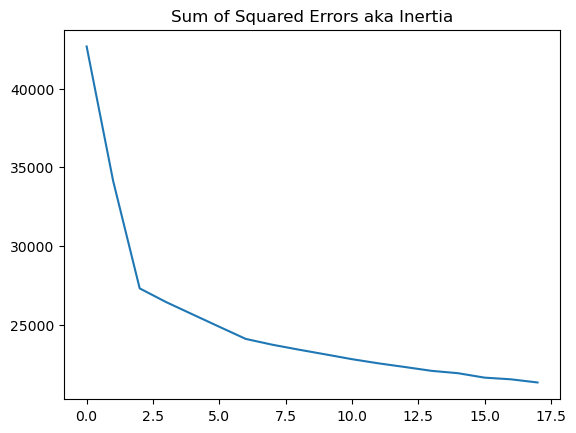

In [108]:
plt.title('Sum of Squared Errors aka Inertia')

# Generate x data with the same length as results
x_data = range(len(results))

plt.plot(x_data, results)
plt.show()


In [109]:
results

[42670.39840330339,
 34126.79579630597,
 27309.858713709968,
 26437.5549340223,
 25654.573128946995,
 24874.104176007873,
 24100.92293605151,
 23733.509752289414,
 23419.46326241923,
 23120.69929209564,
 22816.167465461796,
 22551.66685918911,
 22317.44592550546,
 22074.905091271852,
 21925.025764312995,
 21643.36079340858,
 21535.762930504832,
 21335.652072032783]

# 6. Evaluate Models

## Choose Model and Make Predictions

In [110]:
model=fit_models[4]

In [115]:
def transform(raw_df, onehot,scaler):
    X = raw_df.copy()
    X['timestamp'] = pd.to_datetime (X['published'], unit='s')
    X['day_name'] = X['timestamp'].dt.day_name()
    X = X.drop(['timestamp','published'],axis=1)
                      
    encoded = onehot.transform(X[['user_id','post_type','day_name']])
    scaled = scaler.transform(X.drop(['user_id','post_type','day_name'],axis=1).to_numpy())
    
    return np.c_[scaled,encoded.toarray()]

In [117]:
X_test = transform(test,onehot,scaler)

In [119]:
X_train.shape

(4932, 120)

In [120]:
X_test.shape

(2115, 120)

In [122]:
clusters = model.predict(X_test)
test['cluster'] = clusters
test.head()

,user_id,published,post_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
4545,af60c7fa-acb4-11ec-9224-a0cec8d2d278,1648166400,short,129,53,9,21,13,13,19,29,34,1
2627,af60c7d0-acb4-11ec-935e-a0cec8d2d278,1647820800,video,205,6,18,140,40,7,15,3,0,2
1076,af60c80f-acb4-11ec-87f7-a0cec8d2d278,1647907200,video,252,3,28,149,60,19,14,8,2,2
4824,af60c7e5-acb4-11ec-accd-a0cec8d2d278,1647388800,text,259,54,0,155,49,15,26,0,14,3
3411,af60c7d5-acb4-11ec-8bf8-a0cec8d2d278,1647993600,short,105,12,4,49,16,11,10,8,11,0


## Are cluster 0 posts performing the best?

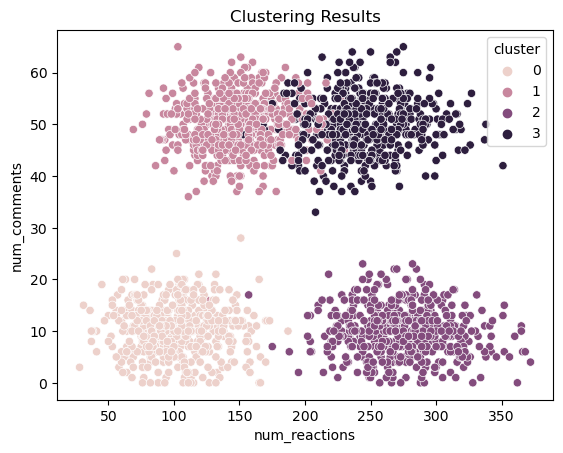

In [124]:
plt.title('Clustering Results')
sns.scatterplot(x='num_reactions',y='num_comments',hue='cluster', data=test)
plt.show()

## Does Cluster Zero have a higher number of Reactions on Average?
- Alternative specifies what the alternative hypothesis represents
- two-sided: $H_0:a=b$, $H_a:a \neq b$
- less: $H_0:a>=b$, $H_a:a<b$
- greater: $H_0:a<=b$, $H_a:a>b$                

In [125]:
from scipy.stats import ttest_ind

In [126]:
#Sample 1: Cluster 0 number of reactions
cluster_zero_samples= test[test['cluster'] ==0]['num_reactions']
# Sample 2: Cluster 1,2,3 number reactions
cluster_other_samples= test[test['cluster'] !=0]['num_reactions']

In [127]:
cluster_zero_samples

3411    105
6682     91
4616    109
5021    119
1052     92
       ... 
3377     56
1342    156
5582     64
6672    103
1527     36
Name: num_reactions, Length: 534, dtype: int64

#Hypothesis test

1. 95%, alpha 1-0.95 = 0.05
2. Formulate hypithesis

H0: Cluster 0 number of reactions <= Cluster 1,2,3 number of reactions
HA: Cluster 0 mean number of reactions > Cluster 1,2,3 number of reactions 

3. pvalue <0.05, reject our null hypothesis which is lending support to the HA 

In [130]:
comparison = ttest_ind(cluster_zero_samples, cluster_other_samples, 
                       alternative='greater',equal_var=False)

In [131]:
comparison.pvalue

1.0

Reject the null HO, lending support to HA 

Cluster zero is performing uniquely well versus the other clusters 
cluster two seems to be performing well, as well when compared to cluster zero

# 7. Deploy

## Score on all Data

In [132]:
X = transform(df,onehot,scaler,)

In [133]:
clusters = model.predict(X)

In [134]:
df['cluster'] = clusters
df.to_csv('cluster_results.csv')

In [135]:
df.head()

,user_id,published,post_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,af60c7da-acb4-11ec-880a-a0cec8d2d278,1648512000,short,216,58,5,53,18,12,21,6,43,1
1,af60c7e4-acb4-11ec-ab31-a0cec8d2d278,1647993600,short,196,45,0,73,35,8,16,25,39,1
2,af60c7f9-acb4-11ec-bead-a0cec8d2d278,1647907200,short,138,6,13,59,33,5,16,12,13,0
3,af60c815-acb4-11ec-a572-a0cec8d2d278,1648080000,short,81,9,1,9,34,18,11,4,5,0
4,af60c80d-acb4-11ec-aeb5-a0cec8d2d278,1647820800,short,166,53,11,75,0,5,17,24,45,1


## Install Dependencies for Dash

In [137]:
from dash import Dash, html,dcc
import plotly.express as px
import pandas as pd 

# 
app = Dash (__name__)
if __name__ == '__main__':
    app.run_server(debug=True)

ModuleNotFoundError: No module named 'dash'